# ***Modelo Decision Tree Classifier***

In [5]:
%load_ext kedro.ipython 

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [6]:
catalog.keys()


[
    'DataSetFIFA22',
    'DataSetFIFA21',
    'DataSetFIFA20',
    'preprocess_fifa_22',
    'preprocess_fifa_21',
    'preprocess_fifa_20',
    'FIFA22_processed_con_transformacion2_columns',
    'FIFA21_processed_con_transformacion2_columnss',
    'FIFA20_processed_con_transformacion2_columns',
    'parameters',
    'model_input_table'
]

In [7]:
catalog.load("model_input_table")

[10/26/25 16:05:19] INFO     Loading data from model_input_table (ParquetDataset)...           ]8;id=404771;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=63508;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,...,Height_cm,Weight_kg,Value_num,Wage_num,Release Clause_num,Best_Position_Grouped_FW,Best_Position_Grouped_GK,Best_Position_Grouped_MF,Overall_Class_Encoded,Year
0,Bruno Fernandes,26,Portugal,88,89,Manchester United,2341,Right,3.0,3.0,...,179,69.000000,107500000.0,250000.0,206900000.0,False,False,True,0,2022
1,L. Goretzka,26,Germany,87,88,FC Bayern München,2314,Right,4.0,4.0,...,189,82.000000,93000000.0,140000.0,160400000.0,False,False,True,0,2022
2,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,2307,Right,5.0,4.0,...,182,83.000000,44500000.0,135000.0,91200000.0,True,False,False,0,2022
3,M. Acuña,29,Argentina,84,84,Sevilla FC,2292,Left,2.0,3.0,...,172,69.000000,37000000.0,45000.0,77700000.0,False,False,False,2,2022
4,J. Kimmich,26,Germany,89,90,FC Bayern München,2283,Right,4.0,4.0,...,177,75.000000,108000000.0,160000.0,186300000.0,False,False,True,0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50521,V. Storsve,17,Norway,50,72,Lillestrøm SK,773,Right,1.0,2.0,...,185,64.863656,50000.0,5000.0,113000.0,False,True,False,1,2020
50522,B. Sinzig,19,Switzerland,50,60,Neuchâtel Xamax,764,Right,1.0,2.0,...,190,81.192968,35000.0,5000.0,58000.0,False,True,False,1,2020
50523,18 N. Krucker,18,Switzerland,50,61,FC St. Gallen,757,Right,1.0,3.0,...,183,79.832192,35000.0,1000.0,66000.0,False,True,False,1,2020
50524,18 A. Viscovo,18,Italy,51,70,Crotone,755,Right,1.0,2.0,...,190,78.925008,60000.0,5000.0,146000.0,False,True,False,1,2020


In [8]:
df_FIFA = catalog.load("model_input_table")

                    INFO     Loading data from model_input_table (ParquetDataset)...           ]8;id=594460;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=842963;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

**Importaciones**

In [9]:
#### # -- Tratamiento de datos --
import numpy as np
import pandas as pd

# -- Gráficos -- 
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

# -- Procesado y modelado --
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.tree # Árboles de decisión

# -- Metricas para modelos de clasificación --
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

#----  Curva ROC y PR ----
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score

# -- GridSearchCV -- 
from sklearn.model_selection import GridSearchCV

#### **Selección de caracteristicas**

In [10]:
X = df_FIFA[['Potential','BallControl']]
y = df_FIFA['Best_Position_Grouped_MF'] # o doble corchete?

#### **División de los datos en entrenamiento y prueba**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### **Creación y entrenamiento del modelo Linear Regression**

In [12]:
modelo = sklearn.tree.DecisionTreeClassifier( class_weight= {0: 14, 1: 15} ,
                                              min_samples_leaf= 10, 
                                              min_samples_split= 30
    # Instanciamos nuestro árbol de decisión.
    # Forzamos que nuestro árbol sólo tenga 10 niveles de profundidad.
    )



In [13]:
modelo.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,30
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,"{0: 14, 1: 15}"


#### **Predicciones sobre el conjunto de prueba**


In [15]:
y_pred = modelo.predict(X_test)

### **Métricas de evaluación**

In [16]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4386 1766]
 [1637 2317]]
              precision    recall  f1-score   support

       False       0.73      0.71      0.72      6152
        True       0.57      0.59      0.58      3954

    accuracy                           0.66     10106
   macro avg       0.65      0.65      0.65     10106
weighted avg       0.67      0.66      0.66     10106



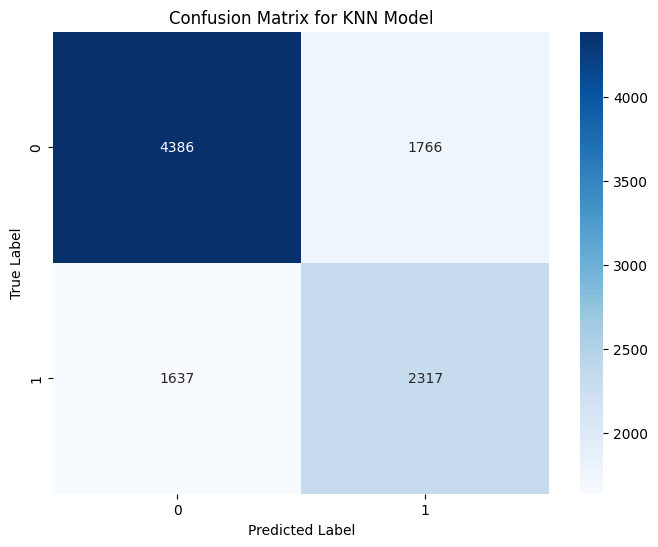

In [18]:
plt.figure(figsize=(8, 6))
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for KNN Model")
plt.show()

#### **Calculando Sensitivity Y Specificity**

In [19]:
cm = confusion_matrix(y_test, y_pred)

# Extrae los valores de la matriz de confusión
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calcula la sensibilidad (Recall)
sensitivity = TP / (TP + FN)

# Calcula la especificidad
specificity = TN / (TN + FP)

print(f"\nSensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")


Sensitivity: 0.5860
Specificity: 0.7129


#### **Visualizando el arbol de decisión**

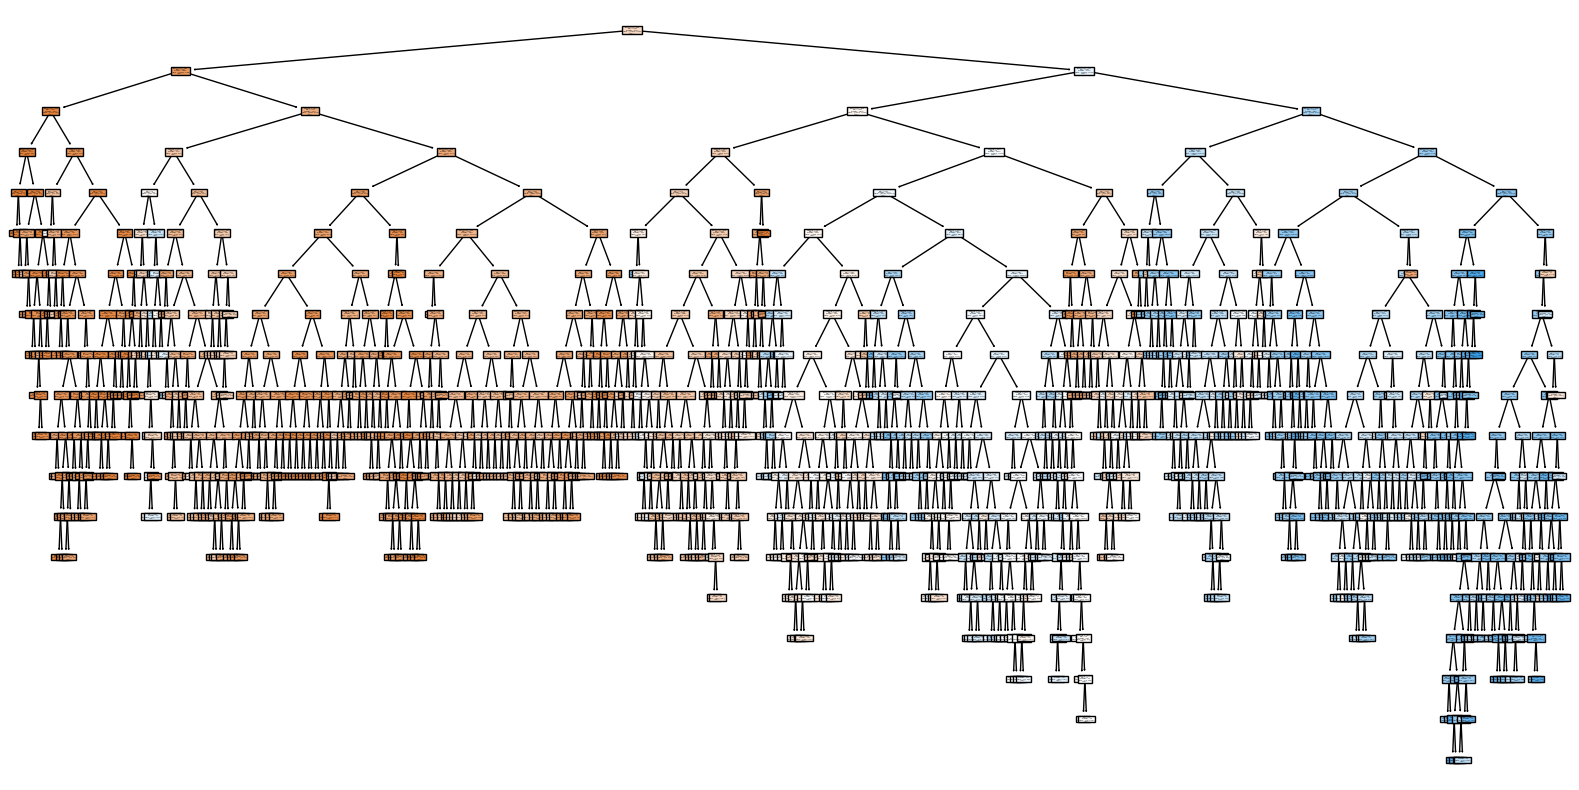

In [23]:
plt.figure(figsize=(20,10))
tree.plot_tree(modelo, feature_names=X.columns, class_names=['-', '-'], filled=True)
plt.show()

#### **Curva ROC**

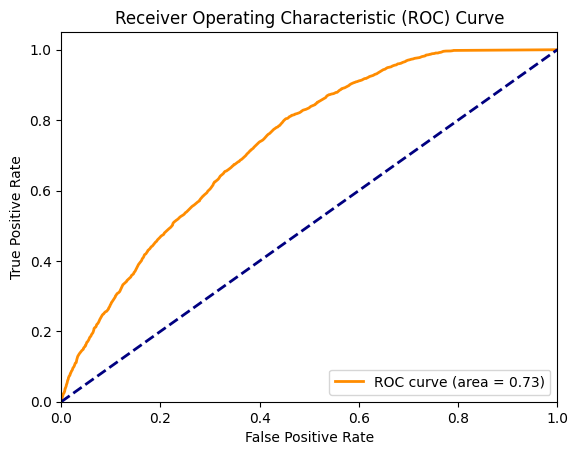


AUC: 0.7343564285775364


In [24]:
y_pred_proba = modelo.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"\nAUC: {roc_auc}")

#### **Curva PR**

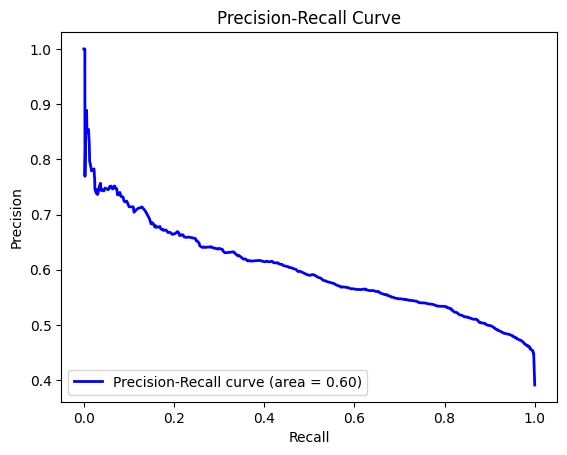


Average Precision (AP): 0.5994078619630506


In [25]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Calculate Average Precision
average_precision = average_precision_score(y_test, y_pred_proba)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

print(f"\nAverage Precision (AP): {average_precision}")


### **GridsearchCV**

Mejores parámetros encontrados:
{'class_weight': None, 'min_samples_leaf': 4, 'min_samples_split': 10}

Mejor puntuación de validación cruzada:
0.6609351806036615

Evaluación en el conjunto de prueba:
Classification Report:
              precision    recall  f1-score   support

       False       0.71      0.75      0.73      6152
        True       0.58      0.53      0.55      3954

    accuracy                           0.66     10106
   macro avg       0.64      0.64      0.64     10106
weighted avg       0.66      0.66      0.66     10106


Confusion Matrix:

Confusion Matrix con los mejores parámetros:


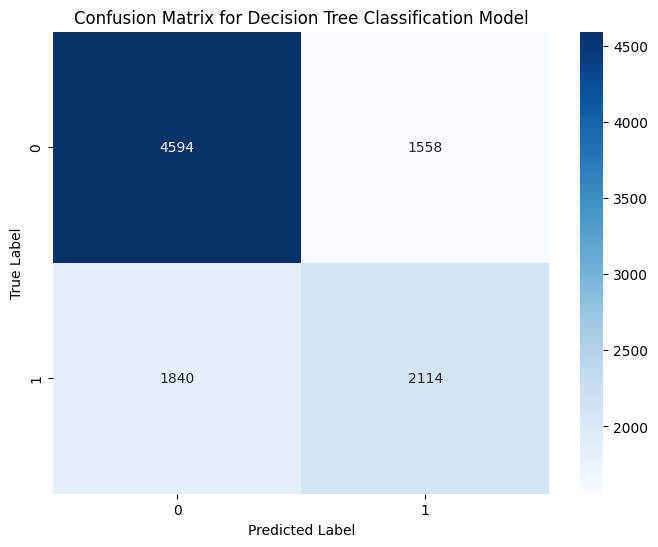


Accuracy Score:
0.663764100534336


In [31]:
# Modelo base
model = DecisionTreeClassifier(random_state=42)

# Rango de hiperparámetros
param_grid = {
    'class_weight': [None, {0:1, 1:1}, {0:1, 1:1.5}, {0:1, 1:2}, {0:1, 1:3}],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'  # o 'f1_macro'
)

# Ajustar a los datos
grid_search.fit(X_train, y_train)

# Resultados
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

print("\nMejor puntuación de validación cruzada:")
print(grid_search.best_score_)

best_model = grid_search.best_estimator_

# Evaluar en el test
y_pred_best = best_model.predict(X_test)
print("\nEvaluación en el conjunto de prueba:")
print("Classification Report:")
print(classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:")
plt.figure(figsize=(8, 6))

print("\nConfusion Matrix con los mejores parámetros:")
sb.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Decision Tree Classification Model")
plt.show()

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_best))

#### **Sensitivity y Specificity modelo con GridSearchCV**

In [27]:
cm_best = confusion_matrix(y_test, y_pred_best)

TN_best = cm_best[0, 0]
FP_best = cm_best[0, 1]
FN_best = cm_best[1, 0]
TP_best = cm_best[1, 1]

sensitivity_best = TP_best / (TP_best + FN_best)
specificity_best = TN_best / (TN_best + FP_best)

print(f"\nSensitivity (Best Model): {sensitivity_best:.4f}")
print(f"Specificity (Best Model): {specificity_best:.4f}")


Sensitivity (Best Model): 0.5346
Specificity (Best Model): 0.7467


#### **Grafica del mejor árbol de decisión GridSearchCV**


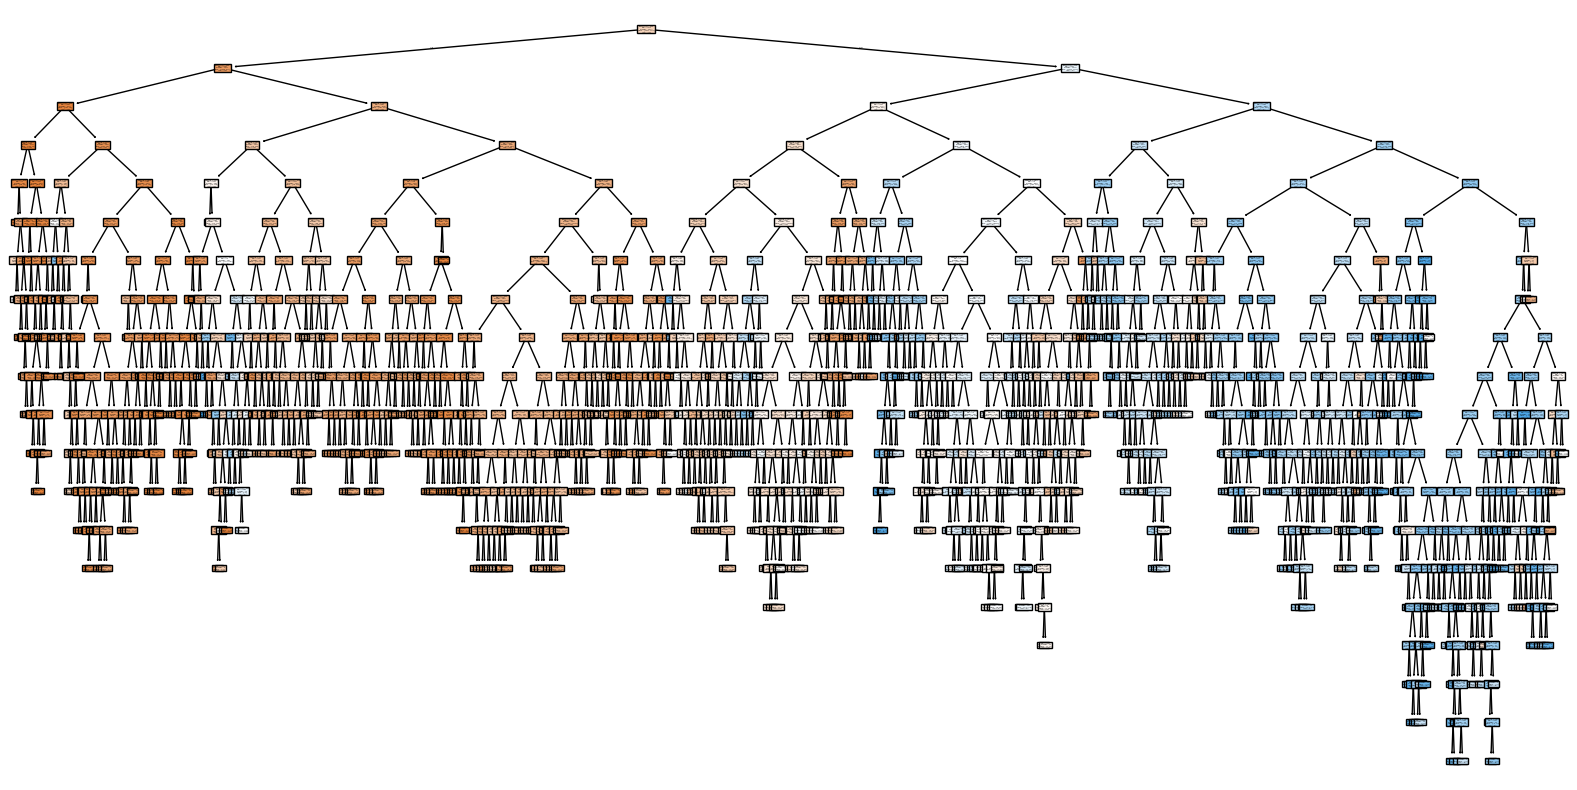

In [28]:
plt.figure(figsize=(20, 10))
tree.plot_tree(best_model, feature_names=X.columns, class_names=['Loss', 'Win'], filled=True)
plt.show()
     

#### **Curva ROC y PR GridSearchCV**

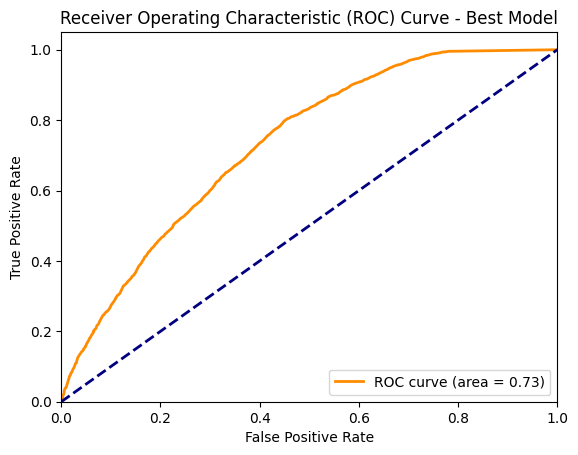


AUC for Best Model: 0.7311531408334995


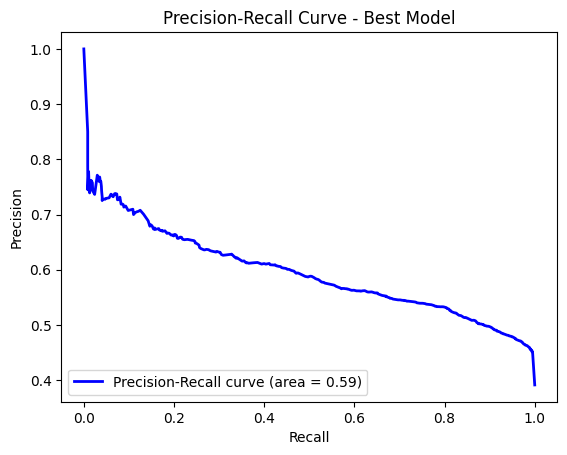


Average Precision (AP) for Best Model: 0.5945574093367081


In [29]:
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC para el mejor modelo
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_proba_best)
roc_auc_best = auc(fpr_best, tpr_best)

# Graficar la curva ROC para el mejor modelo
plt.figure()
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_best)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Best Model')
plt.legend(loc="lower right")
plt.show()

print(f"\nAUC for Best Model: {roc_auc_best}")

# Calcular la curva Precision-Recall para el mejor modelo
precision_best, recall_best, _ = precision_recall_curve(y_test, y_pred_proba_best)
average_precision_best = average_precision_score(y_test, y_pred_proba_best)

# Graficar la curva Precision-Recall para el mejor modelo
plt.figure()
plt.plot(recall_best, precision_best, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision_best)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Best Model')
plt.legend(loc="lower left")
plt.show()

print(f"\nAverage Precision (AP) for Best Model: {average_precision_best}")